# GPAW Tutorial for DeepChem

This tutorial demonstrates how to use GPAW, a Python-based DFT (Density Functional Theory) software, with DeepChem. We'll calculate the electronic structure of a simple material: the silicon (Si) unit cell.

## Setup

In [ ]:
%conda install conda-forge::libxc
%pip install git+https://gitlab.com/gpaw/gpaw
%gpaw install-data .

## Step 1: Create the Unit Cell

We'll use ASE to define the silicon unit cell:

In [3]:
from ase.lattice.cubic import Diamond

# Define a diamond structure for silicon
si = Diamond(symbol="Si", latticeconstant=5.43)

# Visualize the structure
print(si)

Lattice(symbols='Si8', pbc=True, cell=[5.43, 5.43, 5.43])


## Step 2: Set Up the GPAW Calculator

GPAW uses the ASE interface for DFT calculations. We'll set up a calculator for the silicon unit cell:

In [5]:
from gpaw import GPAW, PW

# Set up GPAW calculator with plane-wave basis
calc = GPAW(mode=PW(300),  # Plane wave cutoff energy in eV
            xc='PBE',      # Exchange-correlation functional
            kpts=(4, 4, 4),# k-point grid
            txt='si_gpaw_output.txt')

# Attach calculator to the Si unit cell
si.calc = calc

## Step 3: Perform the Calculation

Run a single-point energy calculation:

In [6]:
# Perform calculation
energy = si.get_potential_energy()
print(f"Total energy: {energy} eV")

Total energy: -43.14923272797004 eV


The output will include the total energy of the silicon unit cell, and details will be logged in `si_gpaw_output.txt`.

## Step 4: Extract and Visualize Results

Extract data from the calculation:

In [7]:
# Get Fermi level
fermi_level = calc.get_fermi_level()
print(f"Fermi level: {fermi_level} eV")

# Get density of states (DOS)
dos = calc.get_dos()
print(f"Density of states: {dos}")

Fermi level: 5.597684849068572 eV
Density of states: (array([-6.94711396, -6.86095469, -6.77479542, -6.68863615, -6.60247688,
       -6.51631761, -6.43015834, -6.34399907, -6.25783981, -6.17168054,
       -6.08552127, -5.999362  , -5.91320273, -5.82704346, -5.74088419,
       -5.65472492, -5.56856565, -5.48240639, -5.39624712, -5.31008785,
       -5.22392858, -5.13776931, -5.05161004, -4.96545077, -4.8792915 ,
       -4.79313224, -4.70697297, -4.6208137 , -4.53465443, -4.44849516,
       -4.36233589, -4.27617662, -4.19001735, -4.10385808, -4.01769882,
       -3.93153955, -3.84538028, -3.75922101, -3.67306174, -3.58690247,
       -3.5007432 , -3.41458393, -3.32842466, -3.2422654 , -3.15610613,
       -3.06994686, -2.98378759, -2.89762832, -2.81146905, -2.72530978,
       -2.63915051, -2.55299125, -2.46683198, -2.38067271, -2.29451344,
       -2.20835417, -2.1221949 , -2.03603563, -1.94987636, -1.86371709,
       -1.77755783, -1.69139856, -1.60523929, -1.51908002, -1.43292075,
       -1.

You can visualize the density of states using libraries such as matplotlib:

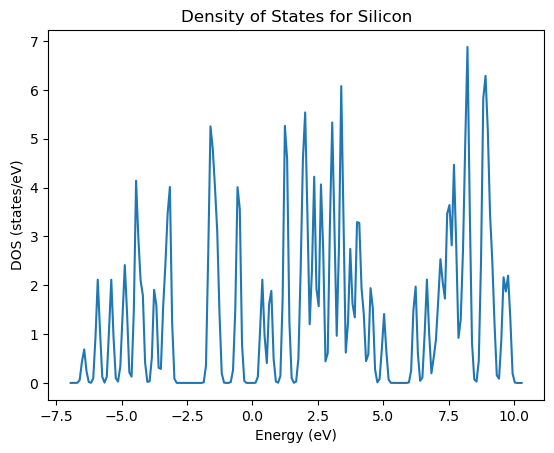

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `calc.get_dos()` returns (energies, dos_values)
energies, dos_values = calc.get_dos()
dos = np.column_stack((energies, dos_values))

# Plot density of states
plt.plot(dos[:, 0], dos[:, 1])
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (states/eV)')
plt.title('Density of States for Silicon')
plt.show()
